# <h1><center> COMMUNICATION THROUGH DATA and STORY THROUGH VISUALIZATION </center></h1>

## Models 

### Meenakshi Nerolu           
### Date: Nov 18, 2020

# Importing Libraries

In [1]:
## import packages:
import numpy as np # for vector operations
from numpy import percentile
import pandas as pd # for Data Frame methods
import matplotlib.pyplot as plt # Two dimensional plotting library
import matplotlib as mpl
import seaborn as sns #  library for making statistical graphics
import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly import tools

# 1.Traffic Violation <a class="anchor" id="sec3"></a> 

## Reading "Traffic_Violations" data

In [2]:
    # Reading csv file
    #traffic = pd.read_csv("Traffic_Violations.csv",low_memory=False)
    
    ## Downloading & Reading csv file from website
    url = 'https://data.montgomerycountymd.gov/api/views/4mse-ku6q/rows.csv?accessType=DOWNLOAD'
    traffic = pd.read_csv(url,low_memory=False)

In [3]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(traffic):

    ## Formatting the Date
    ## Replace white space everywhere
    traffic.columns = traffic.columns.str.replace(' ', '')
    # Confirm the date column is in datetime format
    traffic['DateOfStop'] = pd.to_datetime(traffic['DateOfStop'])

    # Confirm the  time column is in datetime format
    traffic['TimeOfStop'] = pd.to_datetime(traffic['TimeOfStop'])
    # creating  new columns: date, year, month, day, time 
    traffic['date'] = pd.to_datetime(traffic['DateOfStop'])
    traffic['year'] = traffic['DateOfStop'].dt.year
    traffic['month'] = traffic['DateOfStop'].dt.month
    traffic['time'] = traffic['TimeOfStop'].dt.time
    traffic['hour'] = traffic['TimeOfStop'].dt.hour
    traffic['day'] = traffic['DateOfStop'].dt.weekday_name
    
    traffic = traffic.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    traffic = traffic[traffic.date >='01/01/2015']
    traffic = traffic[traffic.date <'11/10/2020']
    traffic = traffic.reset_index(drop=True)
    
    traffic['season']= "Fall"
    traffic.loc[(traffic['month'] < 3) | (traffic['month'] >= 12), "season"] = 'Winter'
    traffic.loc[(traffic['month'] < 6) & (traffic['month'] >= 3), "season"] = 'Spring'
    traffic.loc[(traffic['month'] < 9) & (traffic['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    traffic['Violation'] = pd.Series(1, index=traffic.index)
    
    return traffic

In [4]:
# All the above features are stored in new data frame "traffic_features"
traffic_features = useFeatures(traffic)

In [5]:
traffic_features.head()

,SeqID,DateOfStop,TimeOfStop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,...,ArrestType,Geolocation,date,year,month,time,hour,day,season,Violation
0,b21d6745-197c-4453-b330-55b40cfa08d9,2015-01-01,2020-11-18 00:36:00,MCP,"3rd District, Silver Spring",FAILURE OF VEH. ON HWY. TO DISPLAY LIGHTED LAM...,NB 29/ MUSGROVE,39.065448,-76.960600,No,...,A - Marked Patrol,"(39.0654483333333, -76.9606)",2015-01-01,2015,1,00:36:00,0,Thursday,Winter,1
1,b5daecd2-c7a4-4577-b634-3c46167dd3a0,2015-01-01,2020-11-18 17:38:00,MCP,"4th District, Wheaton",DRIVER FAILURE TO OBEY TRAFFIC DEVICE ON MAKIN...,UNIVERSITY/GRANDVIEW,39.041272,-77.052458,No,...,A - Marked Patrol,"(39.0412716666667, -77.0524583333333)",2015-01-01,2015,1,17:38:00,17,Thursday,Winter,1
2,3051e37d-5f99-43db-8579-283902ea281e,2015-01-01,2020-11-18 23:29:00,MCP,"4th District, Wheaton",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,SB WICKHAM ROAD/BROOM DRIVE,39.156558,-77.093873,No,...,A - Marked Patrol,"(39.1565583333333, -77.0938733333333)",2015-01-01,2015,1,23:29:00,23,Thursday,Winter,1
3,e0b0b225-feb4-42a7-a3dc-06f234f779bc,2015-01-01,2020-11-18 10:24:00,MCP,"4th District, Wheaton",FAILURE TO DRIVE RIGHT OF CENTER,BOWIE MILL RD / BRIARS RD,39.148653,-77.112565,No,...,A - Marked Patrol,"(39.1486533333333, -77.112565)",2015-01-01,2015,1,10:24:00,10,Thursday,Winter,1
4,742bf301-88d4-480f-bd48-7db38d56a78d,2015-01-01,2020-11-18 07:54:00,MCP,"5th District, Germantown",DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,CRYSTAL ROCK DRIVE @ CENTURY BLVD,39.188295,-77.264995,No,...,A - Marked Patrol,"(39.188295, -77.264995)",2015-01-01,2015,1,07:54:00,7,Thursday,Winter,1


## Replace Yes or No by 0 

In [6]:
    ## Replace Yes and No by 1 and 0 respectively
traffic_replace = traffic_features.replace( {'Yes' : 1, 'No' : 0})
    
   
    ## replace the column name Year by Year_model
traffic_replace = traffic_replace.rename(columns={"Year":"Year_model"})
    
    # Delete the following columns as these columns have the highest number of NA's
delete_columns = traffic_replace[['SeqID', 'SearchConducted', 'SearchDisposition', 'SearchOutcome' , 'SearchReason', 'SearchReasonForStop', 'SearchType', 'SearchArrestReason']]
    
    # Delete these columns from the data frame, traffic_new
traffic_new = traffic_replace.drop(delete_columns ,axis=1)

In [7]:
traffic_new["Color"].value_counts()

BLACK          239051
SILVER         206446
WHITE          182195
GRAY           136455
RED             84999
BLUE            80429
GREEN           31513
GOLD            30863
BLUE, DARK      24025
TAN             19406
MAROON          17398
BLUE, LIGHT     13184
BEIGE           10980
GREEN, DK        9629
GREEN, LGT       5314
BROWN            4667
YELLOW           3965
ORANGE           3712
BRONZE           2406
PURPLE           1942
MULTICOLOR        757
CREAM             545
COPPER            346
PINK              143
CHROME             30
CAMOUFLAGE         26
Name: Color, dtype: int64

In [8]:
#rename the colors :
traffic_new = traffic_new.replace({"BLUE, DARK":"BLUE" , "BLUE, LIGHT":"BLUE", "GREEN, DK":"GREEN", "GREEN, LGT":"GREEN" })
traffic_new.head()
print("Size of the data frame : ", traffic_new.shape)
#info() is used to check the Information about the data and the datatypes of each respective attribute.
print("Summary of columns ", traffic_new.info(verbose = False))
#This code prints a summary of columns count and its dtypes but not per column information.
print("\n\nThe column names in the dataframe \n\n :", traffic_new.columns)

Size of the data frame :  (1121980, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1121980 entries, 0 to 1121979
Columns: 43 entries, DateOfStop to Violation
dtypes: bool(1), datetime64[ns](3), float64(3), int64(14), object(22)
memory usage: 360.6+ MB
Summary of columns  None


The column names in the dataframe 

 : Index(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
       'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation'],
      dtype='object')


In [9]:
traffic_final = traffic_new.fillna(method='ffill')

In [10]:
traffic_final.head()

,DateOfStop,TimeOfStop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,ArrestType,Geolocation,date,year,month,time,hour,day,season,Violation
0,2015-01-01,2020-11-18 00:36:00,MCP,"3rd District, Silver Spring",FAILURE OF VEH. ON HWY. TO DISPLAY LIGHTED LAM...,NB 29/ MUSGROVE,39.065448,-76.960600,0,0,...,A - Marked Patrol,"(39.0654483333333, -76.9606)",2015-01-01,2015,1,00:36:00,0,Thursday,Winter,1
1,2015-01-01,2020-11-18 17:38:00,MCP,"4th District, Wheaton",DRIVER FAILURE TO OBEY TRAFFIC DEVICE ON MAKIN...,UNIVERSITY/GRANDVIEW,39.041272,-77.052458,0,0,...,A - Marked Patrol,"(39.0412716666667, -77.0524583333333)",2015-01-01,2015,1,17:38:00,17,Thursday,Winter,1
2,2015-01-01,2020-11-18 23:29:00,MCP,"4th District, Wheaton",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,SB WICKHAM ROAD/BROOM DRIVE,39.156558,-77.093873,0,0,...,A - Marked Patrol,"(39.1565583333333, -77.0938733333333)",2015-01-01,2015,1,23:29:00,23,Thursday,Winter,1
3,2015-01-01,2020-11-18 10:24:00,MCP,"4th District, Wheaton",FAILURE TO DRIVE RIGHT OF CENTER,BOWIE MILL RD / BRIARS RD,39.148653,-77.112565,0,0,...,A - Marked Patrol,"(39.1486533333333, -77.112565)",2015-01-01,2015,1,10:24:00,10,Thursday,Winter,1
4,2015-01-01,2020-11-18 07:54:00,MCP,"5th District, Germantown",DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,CRYSTAL ROCK DRIVE @ CENTURY BLVD,39.188295,-77.264995,0,0,...,A - Marked Patrol,"(39.188295, -77.264995)",2015-01-01,2015,1,07:54:00,7,Thursday,Winter,1


In [11]:
#traffic_new[obj_traffic_new]=traffic_new[obj_traffic_new].fillna("other")
#traffic_new = traffic_new.fillna("")
#traffic_new.head()

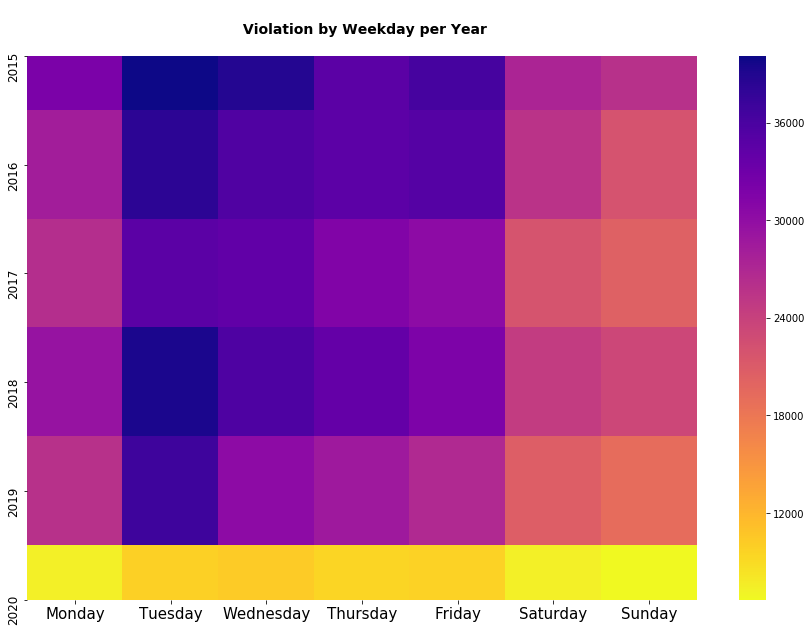

In [12]:
weekdays = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
violationweekday = traffic_final.groupby(['year', 'day']).size()
#Reshape using unstack() function in Pandas python: 
violationweekday = violationweekday.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=weekdays)
plt.figure(figsize=(15,10))
sns.heatmap(violationweekday, cmap='plasma_r')
plt.title('\n Violation by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
plt.savefig('images/violationsbyweekdayperyear.jpg')
plt.show()

# Time Series Decomposition Plot (Traffic Violation)

In [13]:
import time
import datetime 
import dateutil
import statsmodels.api as sm
from dateutil.parser import parse
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [14]:
traffic_timeseries=traffic_final.copy()
#CRI_timeseries['date'] = CRI_timeseries['date'].astype(str)
traffic_timeseries['date'] = pd.to_datetime(traffic_timeseries['date'])
#CRI_timeseries_columns=CRI_timeseries[['']]
#dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in CRI_timeseries['date']])
traffic_timeseries=traffic_timeseries.set_index('date')

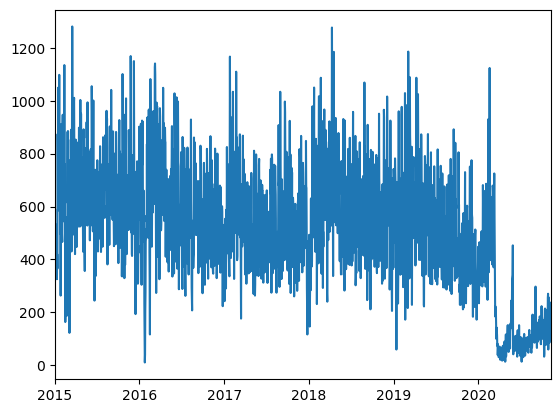

In [15]:
plt.rcdefaults()
violation_per_day=traffic_timeseries['Violation'].groupby(traffic_timeseries.index.date).sum()
violation_per_day.plot()
plt.show()

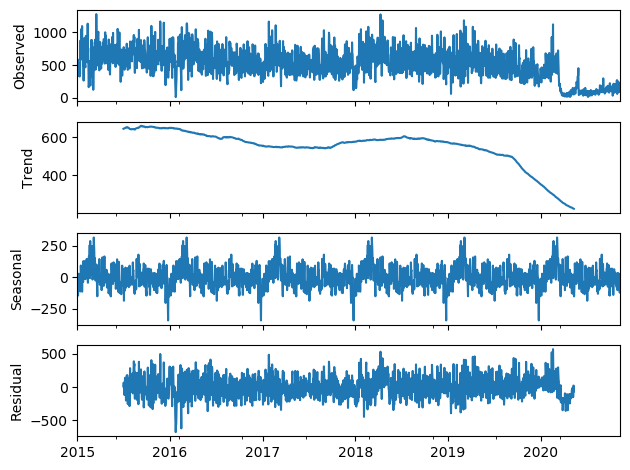

In [16]:
res = seasonal_decompose(violation_per_day, freq=365, model= 'additive')
res.plot()
plt.show()
#resplot = res.plot()
#resplot.savefig('Seasonal_Decompose.png', dpi=150)

# Machine Learning (Traffic Violation)

We will be looking at different columns to figure out predicting about the Citation Type. 

In [17]:
#CRNM_ML = CRNM_new.replace({'InjurySeverity' : {'SUSPECTED MINOR INJURY' : 'SUSPECTED_M_INJURY' , 'POSSIBLE INJURY': 'POSSIBLE_INJURY', 'SUSPECTED SERIOUS INJURY' : 'SUSPECTED_S_INJURY', 'NO APPARENT INJURY' : 'NO_APPARENT_INJURY','FATAL INJURY' : 'FATAL_INJURY' }})
traffic_ML = traffic_final.copy()
traffic_ML.head()

,DateOfStop,TimeOfStop,Agency,SubAgency,Description,Location,Latitude,Longitude,Accident,Belts,...,ArrestType,Geolocation,date,year,month,time,hour,day,season,Violation
0,2015-01-01,2020-11-18 00:36:00,MCP,"3rd District, Silver Spring",FAILURE OF VEH. ON HWY. TO DISPLAY LIGHTED LAM...,NB 29/ MUSGROVE,39.065448,-76.960600,0,0,...,A - Marked Patrol,"(39.0654483333333, -76.9606)",2015-01-01,2015,1,00:36:00,0,Thursday,Winter,1
1,2015-01-01,2020-11-18 17:38:00,MCP,"4th District, Wheaton",DRIVER FAILURE TO OBEY TRAFFIC DEVICE ON MAKIN...,UNIVERSITY/GRANDVIEW,39.041272,-77.052458,0,0,...,A - Marked Patrol,"(39.0412716666667, -77.0524583333333)",2015-01-01,2015,1,17:38:00,17,Thursday,Winter,1
2,2015-01-01,2020-11-18 23:29:00,MCP,"4th District, Wheaton",NEGLIGENT DRIVING VEHICLE IN CARELESS AND IMPR...,SB WICKHAM ROAD/BROOM DRIVE,39.156558,-77.093873,0,0,...,A - Marked Patrol,"(39.1565583333333, -77.0938733333333)",2015-01-01,2015,1,23:29:00,23,Thursday,Winter,1
3,2015-01-01,2020-11-18 10:24:00,MCP,"4th District, Wheaton",FAILURE TO DRIVE RIGHT OF CENTER,BOWIE MILL RD / BRIARS RD,39.148653,-77.112565,0,0,...,A - Marked Patrol,"(39.1486533333333, -77.112565)",2015-01-01,2015,1,10:24:00,10,Thursday,Winter,1
4,2015-01-01,2020-11-18 07:54:00,MCP,"5th District, Germantown",DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,CRYSTAL ROCK DRIVE @ CENTURY BLVD,39.188295,-77.264995,0,0,...,A - Marked Patrol,"(39.188295, -77.264995)",2015-01-01,2015,1,07:54:00,7,Thursday,Winter,1


In [18]:
traffic_ML.columns

Index(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
       'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation'],
      dtype='object')

In [19]:
violtype_ml = traffic_ML[['ViolationType', 'Accident', 'Belts','PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
                            'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'year', 'hour'
                          ]]

In [20]:
violtype_ml.head()

,ViolationType,Accident,Belts,PersonalInjury,PropertyDamage,Fatal,CommercialLicense,HAZMAT,CommercialVehicle,Alcohol,WorkZone,year,hour
0,Warning,0,0,0,0,0,0,0,0,0,0,2015,0
1,Citation,0,0,0,0,0,0,0,0,0,0,2015,17
2,Warning,0,0,0,0,0,0,0,0,0,0,2015,23
3,Warning,0,0,0,0,0,0,0,0,0,0,2015,10
4,Warning,0,0,0,0,0,0,0,0,0,0,2015,7


In [82]:
# import the class
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import log_loss
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score
# Split the data into a training and test set.
#X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              #CRNM_ML['InjurySeverity'].values,test_size=0.20, random_state=99)
features = np.array(violtype_ml.drop('ViolationType' ,axis=1))
target =np.array( violtype_ml['ViolationType'])
X_train, X_test, y_train, y_test = train_test_split(features,target  
                                             ,test_size=0.20, random_state=99)
print("done")

done


In [22]:
print ('Shape of X:', features.shape)
print ('Shape of y:', target.shape)
print ('Shape of X_train:', X_train.shape)
print ('Shape of y_train:', y_train.shape)
print ('Shape of X_test:', X_test.shape)
print ('Shape of y_test:', y_test.shape)

Shape of X: (1121980, 12)
Shape of y: (1121980,)
Shape of X_train: (897584, 12)
Shape of y_train: (897584,)
Shape of X_test: (224396, 12)
Shape of y_test: (224396,)


# Logistic Regression

In [23]:
logmodel=LogisticRegression()
## fit the model with data
logmodel.fit(X_train, y_train)
y_pred = logmodel.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
#print("ROC score",roc_auc_score(y_test, y_pred))
#print("F1 score",f1_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



Accuracy: 0.5725636820620689


In [24]:
print('Accuracy1 :',logmodel.score(X_train,y_train))
print('Accuracy2 :',logmodel.score(X_test,y_test))

Accuracy1 : 0.5731173906843259
Accuracy2 : 0.5725636820620689


## Model Evaluation using Confusion Matrix

In [25]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



              precision    recall  f1-score   support

    Citation       0.62      0.18      0.28     92664
       ESERO       0.00      0.00      0.00     10658
     Warning       0.57      0.92      0.70    121074

    accuracy                           0.57    224396
   macro avg       0.40      0.37      0.33    224396
weighted avg       0.56      0.57      0.49    224396

[[ 16925      0  75739]
 [   827      0   9831]
 [  9518      0 111556]]
0.5725636820620689


# Random Forest

In [26]:
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train,y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_test, y_test)
acc_random_forest1 = round(random_forest.score(X_test, y_test) * 100, 2)

sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=Y_pred)
print("Accuracy" , acc_random_forest1)
print(sk_report)
pd.crosstab(y_test, Y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 59.9
              precision    recall  f1-score   support

    Citation   0.668961  0.265378  0.380007     92664
       ESERO   0.000000  0.000000  0.000000     10658
     Warning   0.585330  0.907098  0.711527    121074

    accuracy                       0.599017    224396
   macro avg   0.418097  0.390825  0.363845    224396
weighted avg   0.592064  0.599017  0.540831    224396



Predicted,Citation,ESERO,Warning,All
Actual,,,,
Citation,24591,2,68071,92664
ESERO,924,0,9734,10658
Warning,11245,3,109826,121074
All,36760,5,187631,224396


# Prediction of Gender

In [27]:
traffic_ML.columns

Index(['DateOfStop', 'TimeOfStop', 'Agency', 'SubAgency', 'Description',
       'Location', 'Latitude', 'Longitude', 'Accident', 'Belts',
       'PersonalInjury', 'PropertyDamage', 'Fatal', 'CommercialLicense',
       'HAZMAT', 'CommercialVehicle', 'Alcohol', 'WorkZone', 'State',
       'VehicleType', 'Year_model', 'Make', 'Model', 'Color', 'ViolationType',
       'Charge', 'Article', 'ContributedToAccident', 'Race', 'Gender',
       'DriverCity', 'DriverState', 'DLState', 'ArrestType', 'Geolocation',
       'date', 'year', 'month', 'time', 'hour', 'day', 'season', 'Violation'],
      dtype='object')

In [28]:
gender_ml = traffic_ML[['ViolationType', 'Race', 'Color', 'VehicleType','Gender'
                          ]]
gender_ml['Gender'] = np.where(gender_ml['Gender'].str.contains('M'), 1, 0)

In [29]:
# Split the data into a training and test set.
#X_train, X_test, y_train, y_test = train_test_split(accident_ml.values, 
                                              #CRNM_ML['InjurySeverity'].values,test_size=0.20, random_state=99)
features_g =pd.get_dummies(gender_ml.drop('Gender' ,axis=1))
target_g =np.array( gender_ml['Gender'])
X_train_g, X_test_g, y_train_g, y_test_g = train_test_split(features_g,target_g  
                                             ,test_size=0.20, random_state=99)
print("done")

done


In [30]:
logmodel_g=LogisticRegression()
## fit the model with data
logmodel_g.fit(X_train_g, y_train_g)
y_pred_g = logmodel_g.predict(X_test_g)

print("Accuracy:",metrics.accuracy_score(y_test_g, y_pred_g))
#print("ROC score",roc_auc_score(y_test, y_pred))
#print("F1 score",f1_score(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



Accuracy: 0.673100233515749


In [31]:
print('Accuracy1 :',logmodel_g.score(X_train_g,y_train_g))
print('Accuracy2 :',logmodel_g.score(X_test_g,y_test_g))

Accuracy1 : 0.6732183283124477
Accuracy2 : 0.673100233515749


In [32]:
print(classification_report(y_test_g, y_pred_g))
print(confusion_matrix(y_test_g, y_pred_g))
print(accuracy_score(y_test_g,y_pred_g))

              precision    recall  f1-score   support

           0       0.51      0.01      0.02     73376
           1       0.67      1.00      0.80    151020

    accuracy                           0.67    224396
   macro avg       0.59      0.50      0.41    224396
weighted avg       0.62      0.67      0.55    224396

[[   583  72793]
 [   562 150458]]
0.673100233515749


# Random forest (Gender)

In [33]:
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
random_forest_g = RandomForestClassifier(n_estimators=200)
random_forest_g.fit(X_train_g,y_train_g)
Y_pred_g = random_forest_g.predict(X_test_g)
random_forest_g.score(X_test_g, y_test_g)
acc_random_forest1_g = round(random_forest_g.score(X_test_g, y_test_g) * 100, 2)

sk_report_g = classification_report(
    digits=6,
    y_true=y_test_g, 
    y_pred=Y_pred_g)
print("Accuracy" , acc_random_forest1_g)
print(sk_report_g)
pd.crosstab(y_test_g, Y_pred_g, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 67.32
              precision    recall  f1-score   support

           0   0.513487  0.014010  0.027276     73376
           1   0.674685  0.993551  0.803644    151020

    accuracy                       0.673247    224396
   macro avg   0.594086  0.503780  0.415460    224396
weighted avg   0.621974  0.673247  0.549777    224396



Predicted,0,1,All
Actual,,,
0,1028,72348,73376
1,974,150046,151020
All,2002,222394,224396


In [85]:
#Train the model using the training sets y_pred=clf.predict(X_test)
random_forest_g.fit(X_train_g,y_train_g)

y_pred_g = random_forest_g.predict(X_test_g)
y_list_g = [random_forest_g]

Accuracy: 0.6733096846646108


In [89]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test_g, y_pred_g))
print("Precision:",metrics.precision_score(y_test_g, y_pred_g))
print("Recall:",metrics.recall_score(y_test_g, y_pred_g))
print("F1 Score: {}".format(f1_score(y_test_g, y_pred_g)))
print("ROC score",roc_auc_score(y_test_g, y_pred_g))

Accuracy: 0.6733096846646108
Precision: 0.6747059458292867
Recall: 0.9936432260627731
F1 Score: 0.8036890645586298
ROC score 0.5038266282952331


# Crash Incident Data
https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Incidents-Data/bhju-22kf

https://data.montgomerycountymd.gov/Public-Safety/Crash-Reporting-Non-Motorists-Data/n7fk-dce5

# 2. Crash Reporting – Motorists Data 

In [34]:
    # Reading csv file
    #CRI= pd.read_csv("Crash_Reporting_-_Incidents_Data.csv")
    
    ## Downloading & Reading csv file from website
    url_CRI = 'https://data.montgomerycountymd.gov/api/views/bhju-22kf/rows.csv?accessType=DOWNLOAD'
    CRI = pd.read_csv(url_CRI,low_memory=False)

In [35]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(CRI):

    ## Formatting the Date
    
    # Confirm the date column is in datetime format
    CRI['Crash Date/Time'] = pd.to_datetime(CRI['Crash Date/Time'])
   
    # creating  new columns: date, year, month, day, time 
    CRI['date'] = pd.to_datetime(CRI['Crash Date/Time'])
    CRI['year'] = CRI['Crash Date/Time'].dt.year
    CRI['month'] = CRI['Crash Date/Time'].dt.month
    CRI['time'] = CRI['Crash Date/Time'].dt.time
    CRI['hour'] = CRI['Crash Date/Time'].dt.hour
    CRI['day'] = CRI['Crash Date/Time'].dt.weekday_name
    
    CRI = CRI.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    CRI = CRI[CRI.date >='01/01/2015']
    CRI = CRI[CRI.date <'11/10/2020']
    CRI = CRI.reset_index(drop=True)
    
    CRI['season']= "Fall"
    CRI.loc[(CRI['month'] < 3) | (CRI['month'] >= 12), "season"] = 'Winter'
    CRI.loc[(CRI['month'] < 6) & (CRI['month'] >= 3), "season"] = 'Spring'
    CRI.loc[(CRI['month'] < 9) & (CRI['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    CRI['crash'] = pd.Series(1, index=CRI.index)
    
    return CRI

In [36]:
# All the above features are stored in new data frame "CRI_features"
CRI_features = useFeatures(CRI)

In [37]:
## Replace white space everywhere
CRI_features.columns =CRI_features.columns.str.replace(' ', '')

In [38]:
 # Replace all NaN's by 0
#CRI_new = CRI_features.fillna(0)

#Renaming the column and replacing 
CRI_new =  CRI_features.rename(columns={"AgencyName": "Agency"})
CRI_new = CRI_new.replace({'Agency' : {'Montgomery County Police' : 'MCP', 'Rockville Police Departme' : 'RPD'}})
CRI_new.head()

,ReportNumber,LocalCaseNumber,Agency,ACRSReportType,CrashDate/Time,Hit/Run,RouteType,MilePoint,MilePointDirection,LaneDirection,...,Longitude,Location,date,year,month,time,hour,day,season,crash
0,MCP11520005,15000008,MCP,Property Damage Crash,2015-01-01 00:30:00,Yes,Maryland (State),4.38,North,North,...,-77.102673,"(39.02200107, -77.10267305)",2015-01-01 00:30:00,2015,1,00:30:00,0,Thursday,Winter,1
1,MCP2686000D,15000017,MCP,Property Damage Crash,2015-01-01 01:10:00,No,Ramp,0.15,South,South,...,-77.265547,"(39.19661, -77.26554667)",2015-01-01 01:10:00,2015,1,01:10:00,1,Thursday,Winter,1
2,MCP2783000G,15000025,MCP,Injury Crash,2015-01-01 01:14:00,No,Maryland (State),25.21,East,East,...,-77.109803,"(39.09621667, -77.10980333)",2015-01-01 01:14:00,2015,1,01:14:00,1,Thursday,Winter,1
3,MCP2674000D,15000016,MCP,Property Damage Crash,2015-01-01 01:26:00,No,County,0.76,North,West,...,-77.204349,"(39.158059, -77.204349)",2015-01-01 01:26:00,2015,1,01:26:00,1,Thursday,Winter,1
4,MCP23000002,15000197,MCP,Property Damage Crash,2015-01-01 02:00:00,No,County,1.81,North,North,...,-77.093848,"(39.148678, -77.093848)",2015-01-01 02:00:00,2015,1,02:00:00,2,Thursday,Winter,1


In [39]:
CRI_new['Rush_time']=CRI_new['CrashDate/Time'].dt.hour
#create Rush Time by grouping

def rushhour_CRI(hour):
    if hour >= 6 and hour < 10:
        return "Morning Rush"
    elif hour >= 10 and hour < 12:
        return "Day"
    elif hour >= 12 and hour < 14:
        return "Lunch Rush"
    elif hour >= 14 and hour < 16:
        return "Afternoon"
    elif hour >= 16 and hour < 18:
        return "Evening Rush"
    elif hour >= 18 and hour < 22:
        return "Evening"
    else:
        return "Night"

In [40]:
#apply function   
CRI_new['Rush_time']= CRI_new['Rush_time'].apply(rushhour_CRI)

In [41]:
CRI_final = CRI_new.fillna(method='ffill')

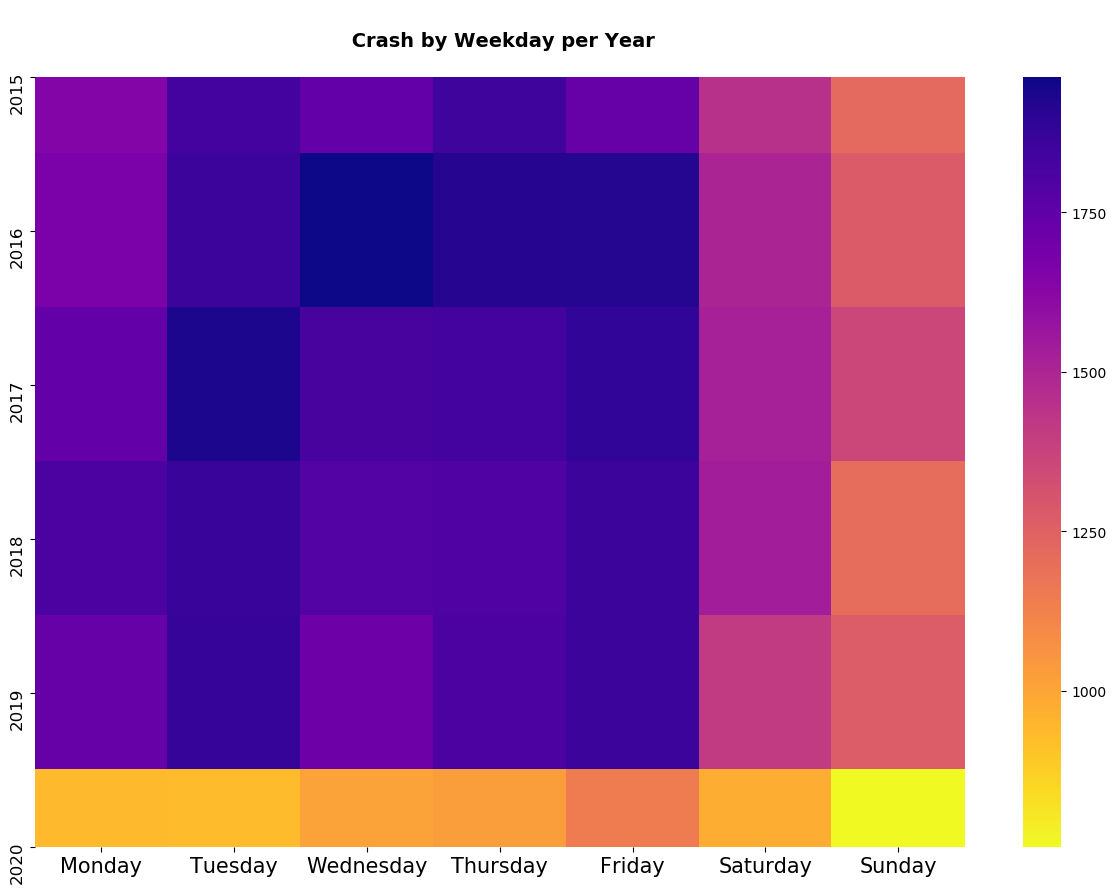

<Figure size 640x480 with 0 Axes>

In [42]:
CRIweekday = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
CRI_weekday = CRI_final.groupby(['year', 'day']).size()
#Reshape using unstack() function in Pandas python: 
CRI_weekday = CRI_weekday.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=CRIweekday)
plt.figure(figsize=(15,10))
sns.heatmap(CRI_weekday, cmap='plasma_r')
plt.title('\n Crash by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
#plt.savefig('crashbyweekdayperyear.jpg')
plt.show()
plt.savefig('images/CRIbyweekdayperyear.jpg')

# 2b. Crash Reporting – Non - Motorists Data

In [43]:
    # Reading csv file
    #CRI= pd.read_csv("Crash_Reporting_-_Incidents_Data.csv")
    
    ## Downloading & Reading csv file from website
    url_CRNM = 'https://data.montgomerycountymd.gov/api/views/n7fk-dce5/rows.csv?accessType=DOWNLOAD'
    CRNM= pd.read_csv(url_CRNM,low_memory=False)

In [44]:
"""" UseFeatues() Function when called, returns a dataframe with additional features"""

def useFeatures(CRNM):

    ## Formatting the Date
    
    # Confirm the date column is in datetime format
    CRNM['Crash Date/Time'] = pd.to_datetime(CRNM['Crash Date/Time'])
   
    # creating  new columns: date, year, month, day, time 
    CRNM['date'] = pd.to_datetime(CRNM['Crash Date/Time'])
    CRNM['year'] = CRNM['Crash Date/Time'].dt.year
    CRNM['month'] = CRNM['Crash Date/Time'].dt.month
    CRNM['time'] = CRNM['Crash Date/Time'].dt.time
    CRNM['hour'] = CRNM['Crash Date/Time'].dt.hour
    CRNM['day'] = CRNM['Crash Date/Time'].dt.weekday_name
    
    CRNM = CRNM.sort_values(by='date')
    

    
    ## Filtering the Desired Date Range - 2015 to 2020 ##
    CRNM = CRNM[CRNM.date >='01/01/2015']
    CRNM = CRNM[CRNM.date <'11/10/2020']
    CRNM = CRNM.reset_index(drop=True)
    
    CRNM['season']= "Fall"
    CRNM.loc[(CRNM['month'] < 3) | (CRNM['month'] >= 12), "season"] = 'Winter'
    CRNM.loc[(CRNM['month'] < 6) & (CRNM['month'] >= 3), "season"] = 'Spring'
    CRNM.loc[(CRNM['month'] < 9) & (CRNM['month'] >= 6), "season"] = 'Summer'
    
    ## Hour status
    ##traffic["hourStatus"] = "Evening"
    ## traffic.loc[( traffic["hour"] < 18) & ( traffic["wdayStatus"] == "Weekday"), "hourStatus"]="WorkHour"
    
    #Creating a new column to count the total number of violation
    CRNM['crash'] = pd.Series(1, index=CRNM.index)
    
    return CRNM

In [45]:
# All the above features are stored in new data frame "CRI_features"
CRNM_features = useFeatures(CRNM)

In [46]:
## Replace white space everywhere
CRNM_features.columns =CRNM_features.columns.str.replace(' ', '')

In [47]:
 # Replace all NaN's by 0
#CRNM_new = CRNM_features.fillna(0)

#Renaming the column and replacing 
CRNM_new =  CRNM_features.rename(columns={"AgencyName": "Agency"})
CRNM_new = CRNM_new.replace({'Agency' : {'Montgomery County Police' : 'MCP', 'Rockville Police Departme' : 'RPD'}})
CRNM_new.head()

,ReportNumber,LocalCaseNumber,Agency,ACRSReportType,CrashDate/Time,RouteType,RoadName,Cross-StreetType,Cross-StreetName,Off-RoadDescription,...,Longitude,Location,date,year,month,time,hour,day,season,crash
0,MCP2439000D,14064779,MCP,Injury Crash,2015-01-01 18:00:00,County,CONTOUR RD,County,HORIZON RUN RD,NaN,...,-77.197752,"(39.1552397, -77.197752)",2015-01-01 18:00:00,2015,1,18:00:00,18,Thursday,Winter,1
1,DD5508000L,15000253,RPD,Injury Crash,2015-01-02 11:51:00,NaN,NaN,NaN,NaN,Parking Lot of 14939 Shady Grove Rd,...,-77.192452,"(39.09749501, -77.19245195)",2015-01-02 11:51:00,2015,1,11:51:00,11,Friday,Winter,1
2,MCP2690000N,15000473,MCP,Injury Crash,2015-01-03 20:31:00,NaN,NaN,NaN,NaN,Parking Lot 13 at 11219 Grandview Ave,...,-77.051365,"(39.03882591, -77.05136508)",2015-01-03 20:31:00,2015,1,20:31:00,20,Saturday,Winter,1
3,MCP27650015,15000583,MCP,Injury Crash,2015-01-04 14:55:00,NaN,NaN,NaN,NaN,Parking lot of Giant Food (12051 Rockville Pike),...,-77.087983,"(38.96282667, -77.08798333)",2015-01-04 14:55:00,2015,1,14:55:00,14,Sunday,Winter,1
4,MCP9379000G,15000697,MCP,Injury Crash,2015-01-05 12:23:00,Maryland (State),FREDERICK RD,Municipality,KING FARM BLVD,NaN,...,-77.168492,"(39.116905, -77.16849167)",2015-01-05 12:23:00,2015,1,12:23:00,12,Monday,Winter,1


In [52]:
CRNM_new['Rush_time']=CRNM_new['CrashDate/Time'].dt.hour
#create Rush Time by grouping

def rushhour_CRNM(hour):
    if hour >= 6 and hour < 10:
        return "Morning Rush"
    elif hour >= 10 and hour < 12:
        return "Day"
    elif hour >= 12 and hour < 14:
        return "Lunch Rush"
    elif hour >= 14 and hour < 16:
        return "Afternoon"
    elif hour >= 16 and hour < 18:
        return "Evening Rush"
    elif hour >= 18 and hour < 22:
        return "Evening"
    else:
        return "Night"

In [53]:
#apply function   
CRNM_new['Rush_time']= CRNM_new['Rush_time'].apply(rushhour_CRI)
#CRNM_new.head()

In [55]:
CRNM_final = CRNM_new.fillna(method='ffill')
CRNM_final.head()

,ReportNumber,LocalCaseNumber,Agency,ACRSReportType,CrashDate/Time,RouteType,RoadName,Cross-StreetType,Cross-StreetName,Off-RoadDescription,...,Location,date,year,month,time,hour,day,season,crash,Rush_time
0,MCP2439000D,14064779,MCP,Injury Crash,2015-01-01 18:00:00,County,CONTOUR RD,County,HORIZON RUN RD,NaN,...,"(39.1552397, -77.197752)",2015-01-01 18:00:00,2015,1,18:00:00,18,Thursday,Winter,1,Evening
1,DD5508000L,15000253,RPD,Injury Crash,2015-01-02 11:51:00,County,CONTOUR RD,County,HORIZON RUN RD,Parking Lot of 14939 Shady Grove Rd,...,"(39.09749501, -77.19245195)",2015-01-02 11:51:00,2015,1,11:51:00,11,Friday,Winter,1,Day
2,MCP2690000N,15000473,MCP,Injury Crash,2015-01-03 20:31:00,County,CONTOUR RD,County,HORIZON RUN RD,Parking Lot 13 at 11219 Grandview Ave,...,"(39.03882591, -77.05136508)",2015-01-03 20:31:00,2015,1,20:31:00,20,Saturday,Winter,1,Evening
3,MCP27650015,15000583,MCP,Injury Crash,2015-01-04 14:55:00,County,CONTOUR RD,County,HORIZON RUN RD,Parking lot of Giant Food (12051 Rockville Pike),...,"(38.96282667, -77.08798333)",2015-01-04 14:55:00,2015,1,14:55:00,14,Sunday,Winter,1,Afternoon
4,MCP9379000G,15000697,MCP,Injury Crash,2015-01-05 12:23:00,Maryland (State),FREDERICK RD,Municipality,KING FARM BLVD,Parking lot of Giant Food (12051 Rockville Pike),...,"(39.116905, -77.16849167)",2015-01-05 12:23:00,2015,1,12:23:00,12,Monday,Winter,1,Lunch Rush


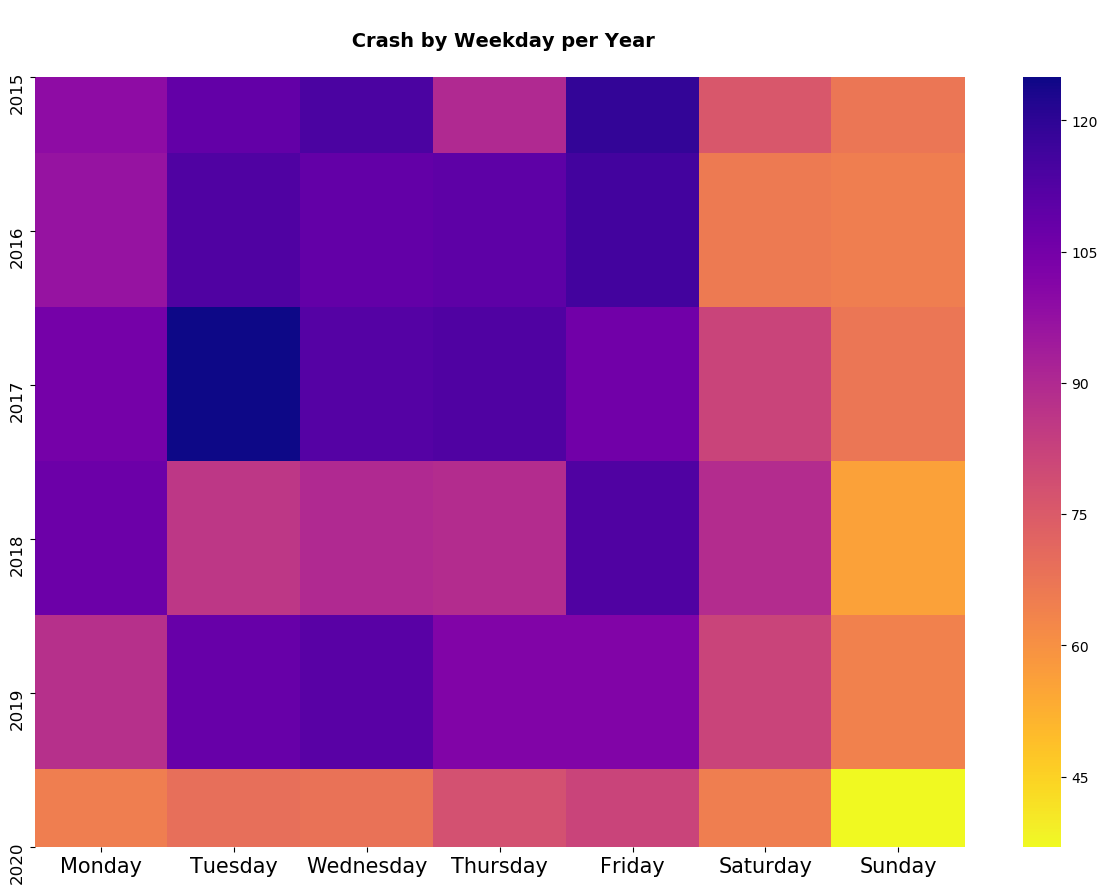

<Figure size 640x480 with 0 Axes>

In [56]:
CRNMweekday = ['Monday', 'Tuesday','Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
CRNM_weekday = CRNM_final.groupby(['year', 'day']).size()
#Reshape using unstack() function in Pandas python: 
CRNM_weekday = CRNM_weekday.rename_axis(['year', 'day'])\
                               .unstack('day')\
                               .reindex(columns=CRIweekday)
plt.figure(figsize=(15,10))
sns.heatmap(CRNM_weekday, cmap='plasma_r')
plt.title('\n Crash by Weekday per Year\n', fontsize=14, fontweight='bold')
plt.xticks(fontsize=15)
plt.yticks(fontsize=12)
plt.xlabel('')
plt.ylabel('')
#plt.savefig('crashbyweekdayperyear.jpg')
plt.show()
plt.savefig('images/CRDbyweekdayperyear.jpg')

# Time Series Decomposition Plot (Motorists Data)

In [57]:
CRI_timeseries=CRI_final.copy()
#CRI_timeseries['date'] = CRI_timeseries['date'].astype(str)
CRI_timeseries['date'] = pd.to_datetime(CRI_timeseries['date'])
#CRI_timeseries_columns=CRI_timeseries[['']]
#dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in CRI_timeseries['date']])
CRI_timeseries=CRI_timeseries.set_index('date')

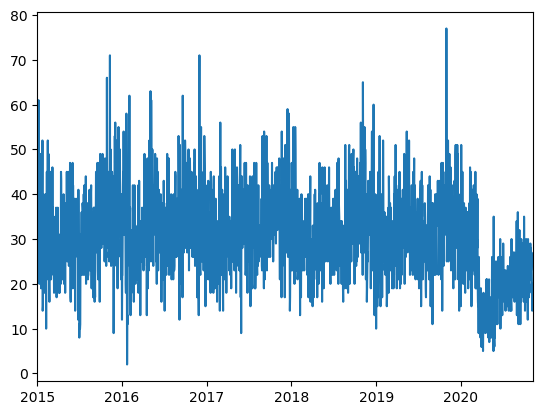

In [58]:
plt.rcdefaults()
crashes_per_day=CRI_timeseries['crash'].groupby(CRI_timeseries.index.date).sum()
crashes_per_day.plot()
plt.show()

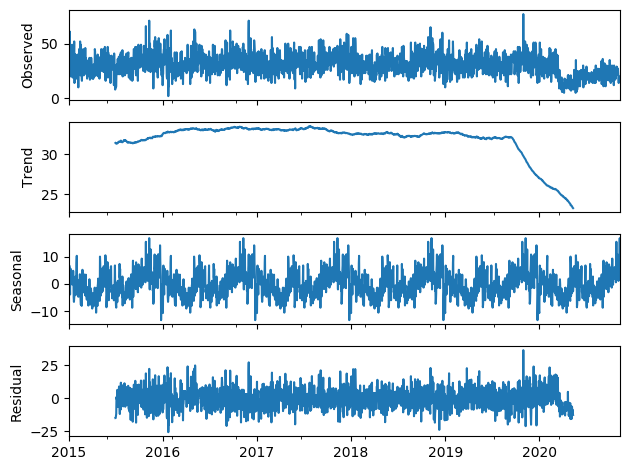

In [60]:
res = seasonal_decompose(crashes_per_day, freq=365, model= 'additive')
res.plot()
plt.show()
#resplot = res.plot()
#resplot.savefig('Seasonal_Decompose.png', dpi=150)

# Time Series Decomposition Plot (Non-Motorists Data)

In [78]:
CRNM_timeseries=CRNM_final.copy()
#CRI_timeseries['date'] = CRI_timeseries['date'].astype(str)
CRNM_timeseries['date'] = pd.to_datetime(CRNM_timeseries['date'])
#CRI_timeseries_columns=CRI_timeseries[['']]
#dates = pd.DatetimeIndex([parse(d).strftime('%Y-%m-01') for d in CRI_timeseries['date']])
CRNM_timeseries=CRNM_timeseries.set_index('date')

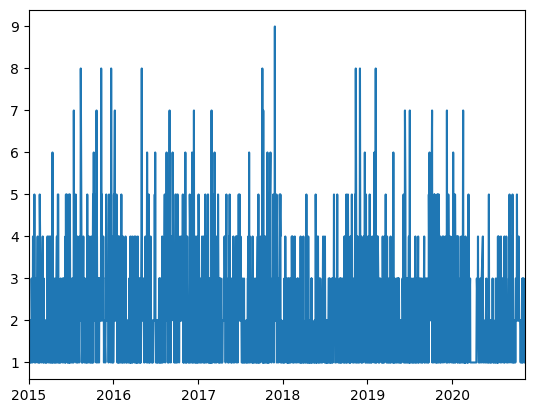

In [80]:
plt.rcdefaults()
crashes_per_day_CRNM=CRNM_timeseries['crash'].groupby(CRNM_timeseries.index.date).sum()
crashes_per_day_CRNM.plot()
plt.show()

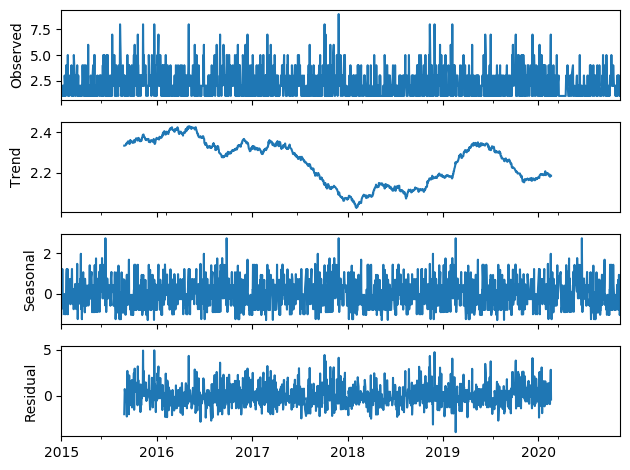

In [81]:
res = seasonal_decompose(crashes_per_day_CRNM, freq=365, model= 'additive')
res.plot()
plt.show()
#resplot = res.plot()
#resplot.savefig('Seasonal_Decompose.png', dpi=150)

# Modeling (Non-Motorists Data)

In [59]:
#CRNM_ML = CRNM_new.replace({'InjurySeverity' : {'SUSPECTED MINOR INJURY' : 'SUSPECTED_M_INJURY' , 'POSSIBLE INJURY': 'POSSIBLE_INJURY', 'SUSPECTED SERIOUS INJURY' : 'SUSPECTED_S_INJURY', 'NO APPARENT INJURY' : 'NO_APPARENT_INJURY','FATAL INJURY' : 'FATAL_INJURY' }})
CRNM_ML = CRNM_final.copy()
CRNM_ML.head()

,ReportNumber,LocalCaseNumber,Agency,ACRSReportType,CrashDate/Time,RouteType,RoadName,Cross-StreetType,Cross-StreetName,Off-RoadDescription,...,Location,date,year,month,time,hour,day,season,crash,Rush_time
0,MCP2439000D,14064779,MCP,Injury Crash,2015-01-01 18:00:00,County,CONTOUR RD,County,HORIZON RUN RD,NaN,...,"(39.1552397, -77.197752)",2015-01-01 18:00:00,2015,1,18:00:00,18,Thursday,Winter,1,Evening
1,DD5508000L,15000253,RPD,Injury Crash,2015-01-02 11:51:00,County,CONTOUR RD,County,HORIZON RUN RD,Parking Lot of 14939 Shady Grove Rd,...,"(39.09749501, -77.19245195)",2015-01-02 11:51:00,2015,1,11:51:00,11,Friday,Winter,1,Day
2,MCP2690000N,15000473,MCP,Injury Crash,2015-01-03 20:31:00,County,CONTOUR RD,County,HORIZON RUN RD,Parking Lot 13 at 11219 Grandview Ave,...,"(39.03882591, -77.05136508)",2015-01-03 20:31:00,2015,1,20:31:00,20,Saturday,Winter,1,Evening
3,MCP27650015,15000583,MCP,Injury Crash,2015-01-04 14:55:00,County,CONTOUR RD,County,HORIZON RUN RD,Parking lot of Giant Food (12051 Rockville Pike),...,"(38.96282667, -77.08798333)",2015-01-04 14:55:00,2015,1,14:55:00,14,Sunday,Winter,1,Afternoon
4,MCP9379000G,15000697,MCP,Injury Crash,2015-01-05 12:23:00,Maryland (State),FREDERICK RD,Municipality,KING FARM BLVD,Parking lot of Giant Food (12051 Rockville Pike),...,"(39.116905, -77.16849167)",2015-01-05 12:23:00,2015,1,12:23:00,12,Monday,Winter,1,Lunch Rush


In [63]:
CRNM_Injury_ml = CRNM_ML[['InjurySeverity','ACRSReportType' , 'RouteType' ,'PedestrianType', 'Weather','SurfaceCondition','CollisionType' , 'day' , 'year'
                          ]]


In [64]:
CRNM_Injury_ml.head()

,InjurySeverity,ACRSReportType,RouteType,PedestrianType,Weather,SurfaceCondition,CollisionType,day,year
0,POSSIBLE INJURY,Injury Crash,County,PEDESTRIAN,CLEAR,DRY,NaN,Thursday,2015
1,POSSIBLE INJURY,Injury Crash,County,PEDESTRIAN,CLEAR,DRY,SINGLE VEHICLE,Friday,2015
2,SUSPECTED MINOR INJURY,Injury Crash,County,PEDESTRIAN,RAINING,DRY,SINGLE VEHICLE,Saturday,2015
3,POSSIBLE INJURY,Injury Crash,County,PEDESTRIAN,RAINING,DRY,SINGLE VEHICLE,Sunday,2015
4,POSSIBLE INJURY,Injury Crash,Maryland (State),PEDESTRIAN,CLEAR,DRY,HEAD ON LEFT TURN,Monday,2015


In [68]:
features_CRNM_Injury = pd.get_dummies(CRNM_Injury_ml.drop('InjurySeverity' ,axis=1))
target_CRNM_Injury =np.array(CRNM_Injury_ml['InjurySeverity'])
X_train_CRNM_Injury, X_test_CRNM_Injury, y_train_CRNM_Injury, y_test_CRNM_Injury = train_test_split(features_CRNM_Injury,target_CRNM_Injury  
                                             ,test_size=0.20, random_state=99)
print("done")

done


In [69]:
print ('Shape of X:', features_CRNM_Injury.shape)
print ('Shape of y:', target_CRNM_Injury.shape)
print ('Shape of X_train:', X_train_CRNM_Injury.shape)
print ('Shape of y_train:', y_train_CRNM_Injury.shape)
print ('Shape of X_test:', X_test_CRNM_Injury.shape)
print ('Shape of y_test:', y_test_CRNM_Injury.shape)

Shape of X: (3811, 61)
Shape of y: (3811,)
Shape of X_train: (3048, 61)
Shape of y_train: (3048,)
Shape of X_test: (763, 61)
Shape of y_test: (763,)


# Logistic Regression (Non-Motorists Data)

In [70]:
logmodel_CRNM_Injury=LogisticRegression()
## fit the model with data
logmodel_CRNM_Injury.fit(X_train_CRNM_Injury, y_train_CRNM_Injury)
y_pred_CRNM_Injury = logmodel_CRNM_Injury.predict(X_test_CRNM_Injury)

print("Accuracy:",metrics.accuracy_score(y_test_CRNM_Injury, y_pred_CRNM_Injury))
#print("ROC score",roc_auc_score(y_test, y_pred))
#print("F1 score",f1_score(y_test, y_pred))

Accuracy: 0.5176933158584535


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning:

Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.



In [72]:
print('Accuracy1 :',logmodel_CRNM_Injury.score(X_train_CRNM_Injury,y_train_CRNM_Injury))
print('Accuracy2 :',logmodel_CRNM_Injury.score(X_test_CRNM_Injury,y_test_CRNM_Injury))

Accuracy1 : 0.5518372703412073
Accuracy2 : 0.5176933158584535


In [73]:
print(classification_report(y_test_CRNM_Injury, y_pred_CRNM_Injury))
print(confusion_matrix(y_test_CRNM_Injury, y_pred_CRNM_Injury))
print(accuracy_score(y_test_CRNM_Injury,y_pred_CRNM_Injury))

                          precision    recall  f1-score   support

            FATAL INJURY       0.96      1.00      0.98        22
      NO APPARENT INJURY       0.98      0.83      0.90        77
         POSSIBLE INJURY       0.37      0.11      0.17       251
  SUSPECTED MINOR INJURY       0.47      0.90      0.62       312
SUSPECTED SERIOUS INJURY       0.00      0.00      0.00       101

                accuracy                           0.52       763
               macro avg       0.56      0.57      0.53       763
            weighted avg       0.44      0.52      0.43       763

[[ 22   0   0   0   0]
 [  0  64   3  10   0]
 [  0   1  28 222   0]
 [  0   0  31 281   0]
 [  1   0  13  87   0]]
0.5176933158584535


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



# Random Forest (Non-Motorists Data)

In [77]:
#import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
random_forest_CRNM_Injury = RandomForestClassifier(n_estimators=200)
random_forest_CRNM_Injury.fit(X_train_CRNM_Injury,y_train_CRNM_Injury)
Y_pred_CRNM_Injury = random_forest_CRNM_Injury.predict(X_test_CRNM_Injury)
random_forest_CRNM_Injury.score(X_test_CRNM_Injury, y_test_CRNM_Injury)
acc_random_forest1_CRNM_Injury = round(random_forest_CRNM_Injury.score(X_test_CRNM_Injury, y_test_CRNM_Injury) * 100, 2)

sk_report_CRNM_Injury = classification_report(
    digits=6,
    y_true=y_test_CRNM_Injury, 
    y_pred=Y_pred_CRNM_Injury)
print("Accuracy" , acc_random_forest1_CRNM_Injury)
print(sk_report_CRNM_Injury)
pd.crosstab(y_test_CRNM_Injury, Y_pred_CRNM_Injury, rownames=['Actual'], colnames=['Predicted'], margins=True)

Accuracy 49.54
                          precision    recall  f1-score   support

            FATAL INJURY   0.956522  1.000000  0.977778        22
      NO APPARENT INJURY   0.890411  0.844156  0.866667        77
         POSSIBLE INJURY   0.397638  0.402390  0.400000       251
  SUSPECTED MINOR INJURY   0.486979  0.599359  0.537356       312
SUSPECTED SERIOUS INJURY   0.103448  0.029703  0.046154       101

                accuracy                       0.495413       763
               macro avg   0.567000  0.575122  0.565591       763
            weighted avg   0.461072  0.495413  0.473081       763



Predicted,FATAL INJURY,NO APPARENT INJURY,POSSIBLE INJURY,SUSPECTED MINOR INJURY,SUSPECTED SERIOUS INJURY,All
Actual,,,,,,
FATAL INJURY,22,0,0,0,0,22
NO APPARENT INJURY,0,65,5,7,0,77
POSSIBLE INJURY,0,5,101,132,13,251
SUSPECTED MINOR INJURY,0,1,111,187,13,312
SUSPECTED SERIOUS INJURY,1,2,37,58,3,101
All,23,73,254,384,29,763
